In [2]:
import pandas as pd
import numpy as np

In [10]:
path = "../foodProject/food_recipes.csv"

In [24]:
foodRecipeCol = ["name", "id", "minutes", "contributor_id", "submitted"]

foodRecipes = pd.read_csv(path, usecols=foodRecipeCol)

In [28]:
foodRecipes.head()

,name,id,minutes,contributor_id,submitted
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16
1,a bit different breakfast pizza,31490,30,26278,2002-06-17
2,all in the kitchen chili,112140,130,196586,2005-02-25
3,alouette potatoes,59389,45,68585,2003-04-14
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25


In [31]:
pathTwo = "../foodProject/food_interactions.csv"

foodInterCol = ["user_id", "recipe_id", "date", "rating"]

foodInteractions = pd.read_csv(pathTwo, usecols=foodInterCol)

foodInteractions.head()

,user_id,recipe_id,date,rating
0,38094,40893,2003-02-17,4
1,1293707,40893,2011-12-21,5
2,8937,44394,2002-12-01,4
3,126440,85009,2010-02-27,5
4,57222,85009,2011-10-01,5


In [47]:
foodRecipes["submitted"] = pd.to_datetime(foodRecipes["submitted"])

In [53]:
foodInteractions["date"] = pd.to_datetime(foodInteractions["date"])

In [71]:
foodInteractions = foodInteractions.astype({"rating": "Int8"})

Importing the two CSVs related to food.com and verifying data integrity with changing date columns from objects to dates and converting rating into Int8 since it runs only 0-5

Starting below is visualizing the data with a histogram showing the distribution of given ratings, a line chart detailing the number of submitted recipes over the years stated in the dataset, and a bar chart of the top contributors by number of recipes submitted on food.com

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

#MatPlotLib and Seaborn libraries imported

sns.set_style('whitegrid')

#Whitegrid for better visuals

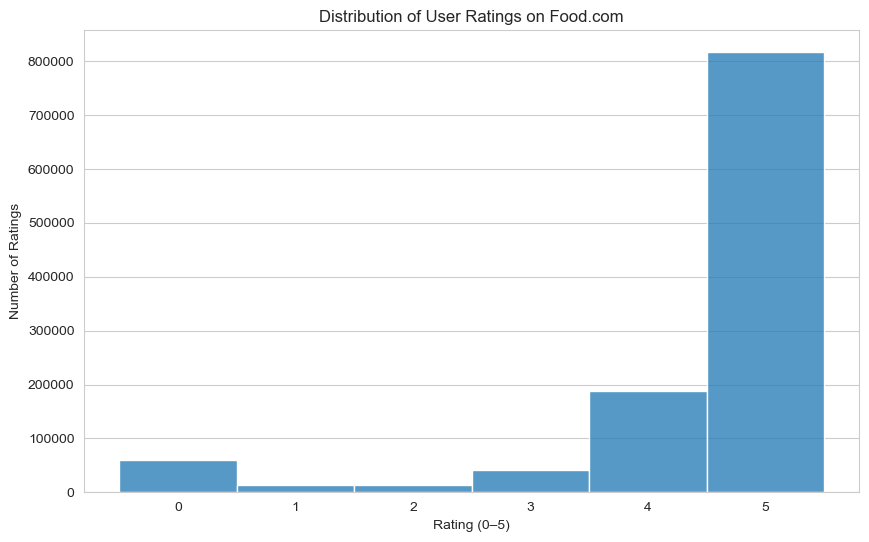

In [93]:
#Creating a Histogram detailing the number of reviews respective to rating 0-5 on food.com

plt.figure(figsize=(10, 6))
reviews = sns.histplot(data=foodInteractions, x="rating", bins=[1, 2, 3, 4, 5, 6], discrete=True)
plt.title("Distribution of User Ratings on Food.com")
plt.xlabel("Rating (0–5)")
plt.ylabel("Number of Ratings")
plt.xticks([0, 1, 2, 3, 4, 5])
reviews.grid(False, axis='x')
plt.show()

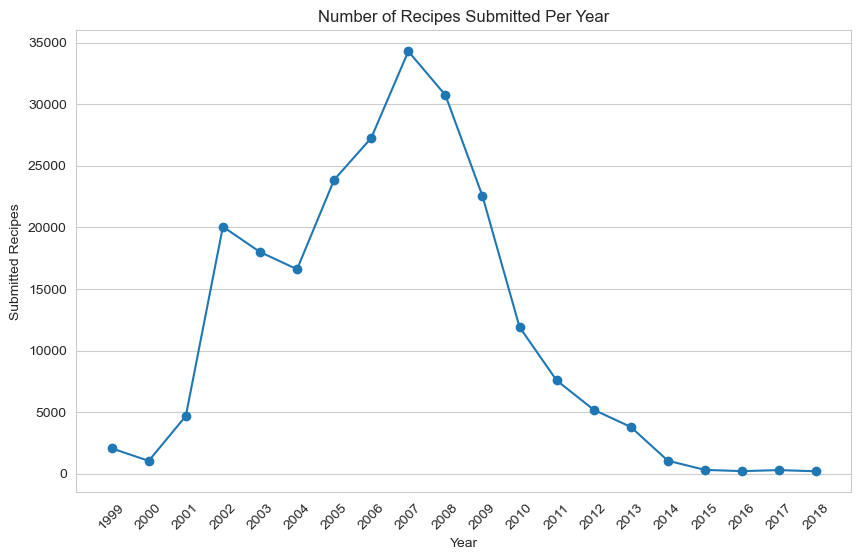

In [99]:
#Creating a Line Chart to detail the number of submitted recipes to food.com by year

#Pulling year from submitted column in dateframe
foodRecipes["submitted_year"] = foodRecipes["submitted"].dt.year
#Grouping years to detail in chart the number of submitted recipes by year
recipes_per_year = foodRecipes.groupby("submitted_year").size()

plt.figure(figsize=(10, 6))
submittedRecipes = recipes_per_year.plot(kind="line", marker="o")
plt.title("Number of Recipes Submitted Per Year")
plt.xlabel("Year")
plt.ylabel("Submitted Recipes")
plt.xticks(recipes_per_year.index, rotation=45)
submittedRecipes.grid(False, axis='x')
plt.show()

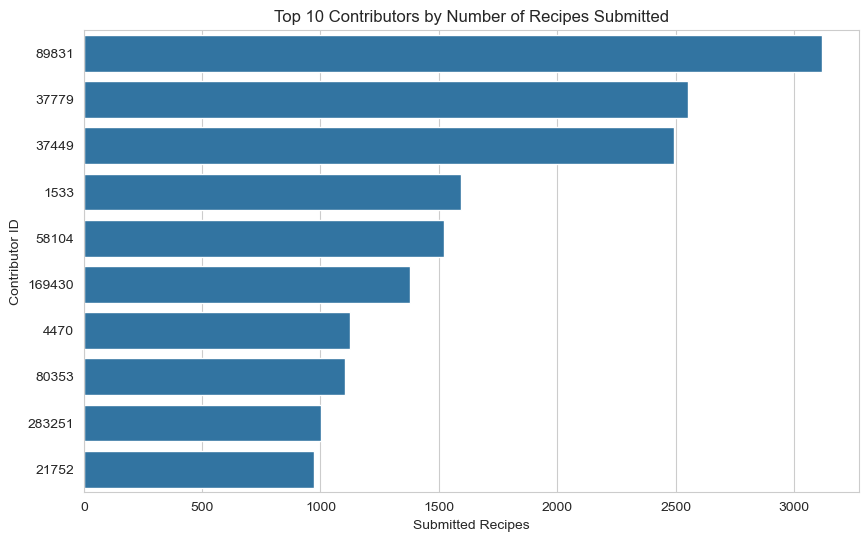

In [107]:
#Creating a bar chart to detail the top contributors that have submitted recipes on Food.com

#Count recipes per contributor
contributor_counts = foodRecipes.groupby("contributor_id").size().reset_index(name="recipe_count")
#Sort and select top 10
top_contributors = contributor_counts.sort_values(by="recipe_count", ascending=False).head(10)
#Convert contributor_id to string for better labeling
top_contributors["contributor_id"] = top_contributors["contributor_id"].astype(str)

plt.figure(figsize=(10, 6))
contributor = sns.barplot(data=top_contributors, x="recipe_count", y="contributor_id")
plt.title("Top 10 Contributors by Number of Recipes Submitted")
plt.xlabel("Submitted Recipes")
plt.ylabel("Contributor ID")
plt.show()

After completing the three main visualization I wanted to create through Python, I wanted to take a look at contributor 89831 since in this dataset they have submitted over 3000 recipes to food.com

Below is a bar chart to detail their recipes by the highest number of reviews.

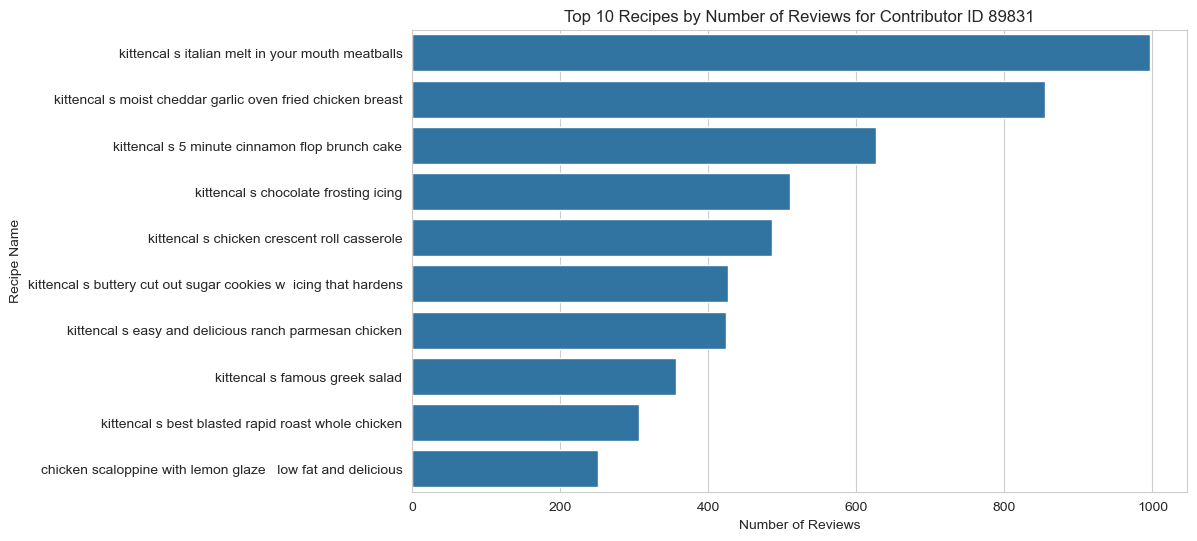

In [111]:
#Creating bar chart to review the top recipes by number of reviews from contributor 89831

#Filter recipes for contributor_id=89831
contributor_recipes = foodRecipes[foodRecipes["contributor_id"] == 89831][["id", "name"]]
#Count reviews per recipe_id
review_counts = foodInteractions.groupby("recipe_id")["user_id"].count().reset_index(name="review_count")
#Merge/Inner Join to get recipe names and review counts
merged_data = pd.merge(contributor_recipes, review_counts, left_on="id", right_on="recipe_id", how="inner")
#Sort and select top 10 by review count
top_10_reviews = merged_data.sort_values(by="review_count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
user89831 = sns.barplot(data=top_10_reviews, x="review_count", y="name")
plt.title("Top 10 Recipes by Number of Reviews for Contributor ID 89831")
plt.xlabel("Number of Reviews")
plt.ylabel("Recipe Name")
plt.show()